<a href="https://colab.research.google.com/github/sadikurSenpai/Deep-Learning/blob/main/Perceptron/BackPropagation_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [197]:
import numpy as np
import random

In [198]:
import pandas as pd

In [199]:
data = pd.DataFrame(data=[[8, 8, 4], [7, 9, 5], [6, 10, 6], [5, 12, 7]], columns=['cgpa', 'profile_score', 'lpa'])
data

,cgpa,profile_score,lpa
0,8,8,4
1,7,9,5
2,6,10,6
3,5,12,7


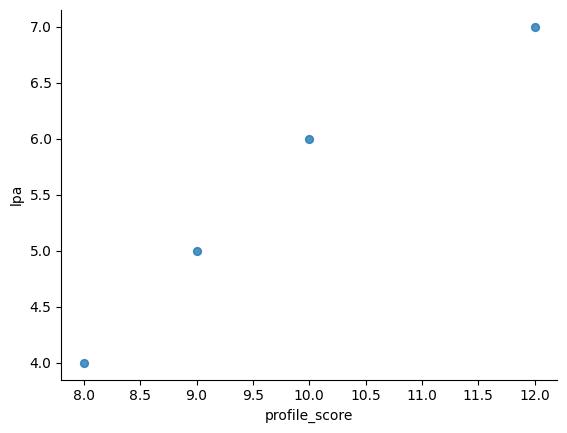

In [200]:
from matplotlib import pyplot as plt
data.plot(kind='scatter', x='profile_score', y='lpa', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [201]:
# Hyperparameters
input_size = 2
hidden_size = 2
output_size = 1
learning_rate = 0.001
max_epochs = 100

In [202]:
# Initialize weights and biases
np.random.seed(0)  # For reproducibility
weights_input_hidden = np.random.randn(input_size, hidden_size)
weights_hidden_output = np.random.randn(hidden_size, output_size)
bias_hidden = np.random.randn(hidden_size)
bias_output = np.random.randn(output_size)

In [203]:
weights_input_hidden

array([[1.76405235, 0.40015721],
       [0.97873798, 2.2408932 ]])

In [204]:
weights_hidden_output

array([[ 1.86755799],
       [-0.97727788]])

In [205]:
bias_hidden

array([ 0.95008842, -0.15135721])

In [206]:
bias_output

array([-0.10321885])

In [207]:
def forward_propagation(x):
  z_hidden = np.dot(x, weights_input_hidden) + bias_hidden # calculating z
  a_hidden = z_hidden # as it is a linear

  z_output = np.dot(a_hidden, weights_hidden_output) + bias_output
  y_hat = z_output
  return y_hat, a_hidden

In [208]:
def update_weights(y, y_hat, a_hidden, weights_input_hidden, weights_hidden_output, x):
  # print(f"Previous weights: {weights_input_hidden}")
  # print(f"Previous weights: {weights_hidden_output}")
  # print(f"Previous bias: {bias_hidden}")
  # print(f"Previous bias: {bias_output}")

  weights_input_hidden[0, 0] = weights_input_hidden[0, 0] - learning_rate * (-2 * (y-y_hat) * weights_hidden_output[0, 0] * x[0])
  weights_input_hidden[0, 1] = weights_input_hidden[0, 1] - learning_rate * (-2 * (y-y_hat) * weights_hidden_output[0, 0] * x[1])
  bias_hidden[0] = bias_hidden[0] - learning_rate * (-2 * (y-y_hat) * weights_hidden_output[0, 0])

  weights_input_hidden[1, 0] = weights_input_hidden[1, 0] - learning_rate * (-2 * (y-y_hat) * weights_hidden_output[1, 0] * x[0])
  weights_input_hidden[1, 1] = weights_input_hidden[1, 1] - learning_rate * (-2 * (y-y_hat) * weights_hidden_output[1, 0] * x[1])
  bias_hidden[1] = bias_hidden[1] - learning_rate * (-2 * (y-y_hat) * weights_hidden_output[1, 0])

  weights_hidden_output[0, 0] = weights_hidden_output[0, 0] - learning_rate * (-2 * (y-y_hat) * a_hidden[0])
  weights_hidden_output[1, 0] = weights_hidden_output[1, 0] - learning_rate * (-2 * (y-y_hat) * a_hidden[1])
  bias_output[0] = bias_output[0] - learning_rate * (-2 * (y-y_hat))

  # print(f"Updated weights: {weights_input_hidden}")
  # print(f"Updated weights: {weights_hidden_output}")
  # print(f"Updated bias: {bias_hidden}")
  # print(f"Updated bias: {bias_output}")

In [209]:
def loss_function(y, y_hat):
  return (y-y_hat)**2

In [210]:
def back_propagation():
  for epoch in range(max_epochs):
    loss = 0
    for i in range(len(data)):
      j = random.randint(0, len(data)-1)
      x = data.iloc[j, 0:2]
      y = data.iloc[j, 2]
      y_hat, a_hidden = forward_propagation(x)
      loss += loss_function(y, y_hat)
      update_weights(y, y_hat, a_hidden, weights_input_hidden, weights_hidden_output, x)
    print(f"After epoch {epoch}: Loss : {loss}")

In [211]:
back_propagation()

<ipython-input-208-bbce6f101ed2>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  weights_input_hidden[0, 0] = weights_input_hidden[0, 0] - learning_rate * (-2 * (y-y_hat) * weights_hidden_output[0, 0] * x[0])
<ipython-input-208-bbce6f101ed2>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  weights_input_hidden[0, 0] = weights_input_hidden[0, 0] - learning_rate * (-2 * (y-y_hat) * weights_hidden_output[0, 0] * x[0])
<ipython-input-208-bbce6f101ed2>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior)

After epoch 0: Loss : [239.62384516]
After epoch 1: Loss : [826.34465669]
After epoch 2: Loss : [412.04066309]
After epoch 3: Loss : [269.13518971]
After epoch 4: Loss : [56.26332104]
After epoch 5: Loss : [103.94946221]
After epoch 6: Loss : [42.3773539]
After epoch 7: Loss : [22.51661579]
After epoch 8: Loss : [12.99415896]
After epoch 9: Loss : [24.48234183]
After epoch 10: Loss : [23.81351226]
After epoch 11: Loss : [41.7811219]
After epoch 12: Loss : [22.08152448]
After epoch 13: Loss : [1.41049205]
After epoch 14: Loss : [5.29515147]
After epoch 15: Loss : [36.1893524]
After epoch 16: Loss : [4.70933101]
After epoch 17: Loss : [20.35252007]
After epoch 18: Loss : [6.97463024]
After epoch 19: Loss : [9.82337165]
After epoch 20: Loss : [24.71342812]
After epoch 21: Loss : [3.01547131]
After epoch 22: Loss : [4.45299285]
After epoch 23: Loss : [13.62194805]
After epoch 24: Loss : [15.59336187]
After epoch 25: Loss : [7.1992767]
After epoch 26: Loss : [3.43035496]
After epoch 27: Los

In [213]:
x = data.iloc[0, 0:2]
y = data.iloc[0, 2]
y_hat, a_hidden = forward_propagation(x)
y_hat

array([4.14074154])